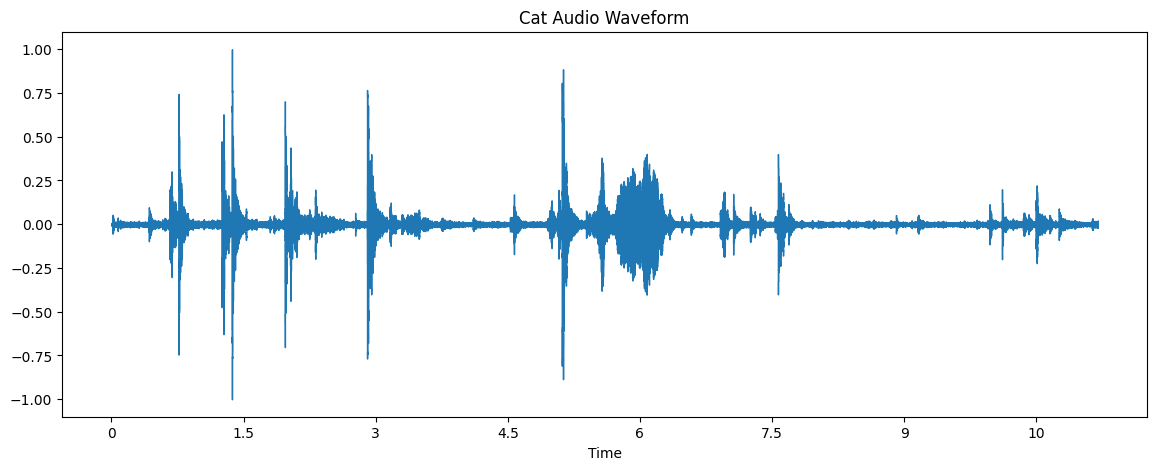

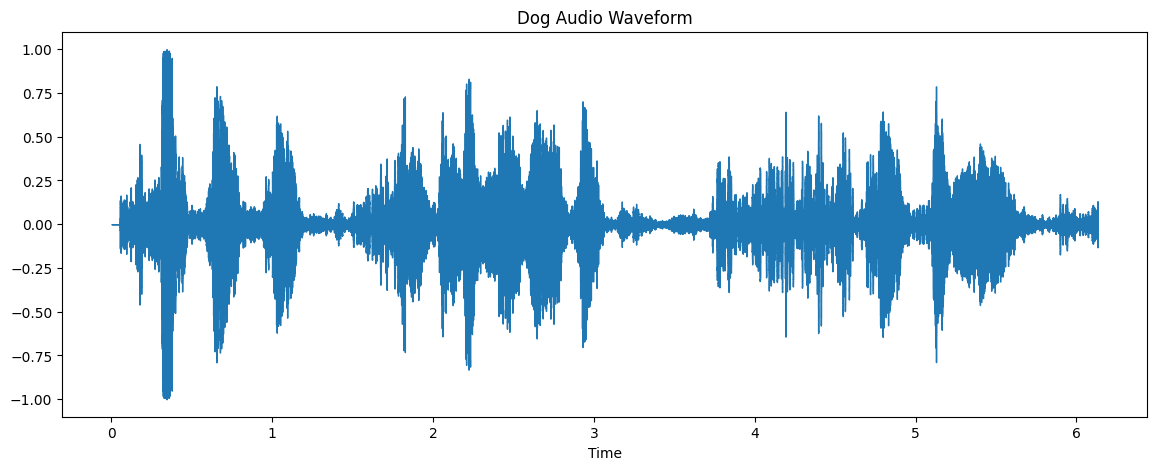

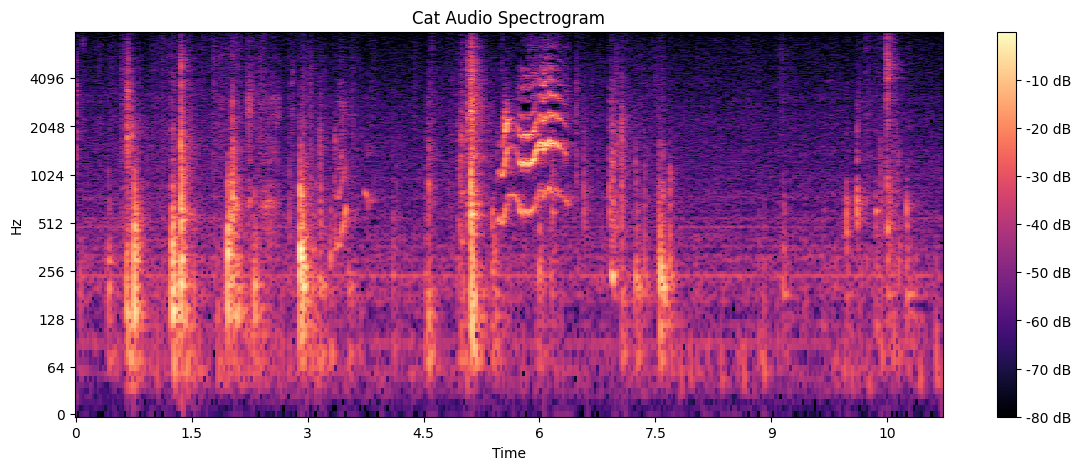

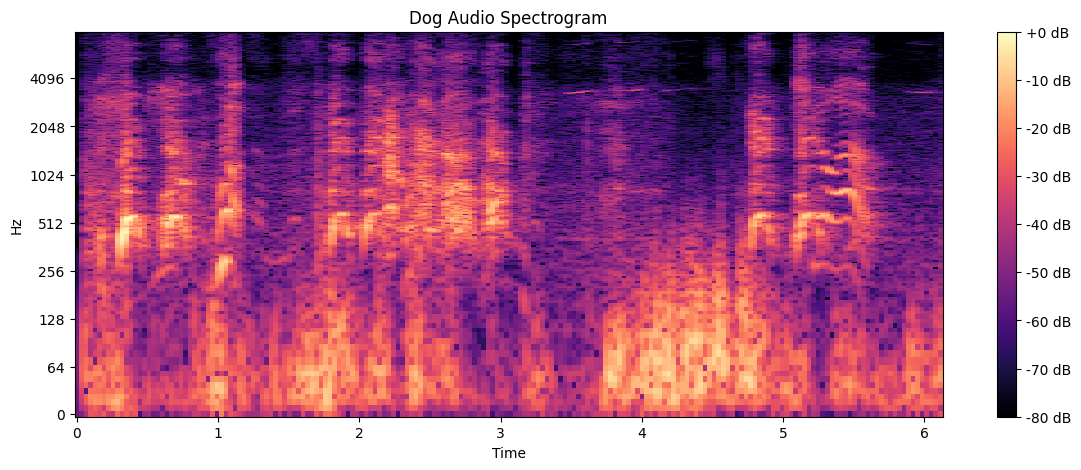

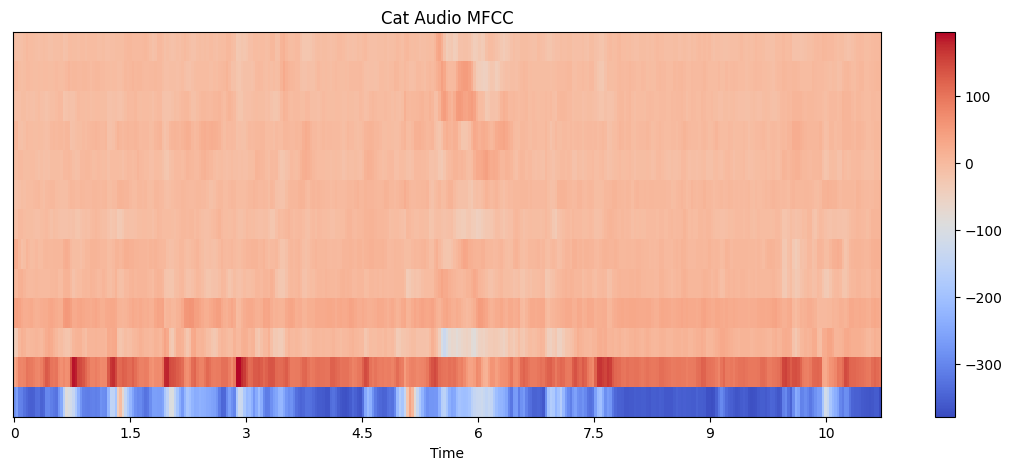

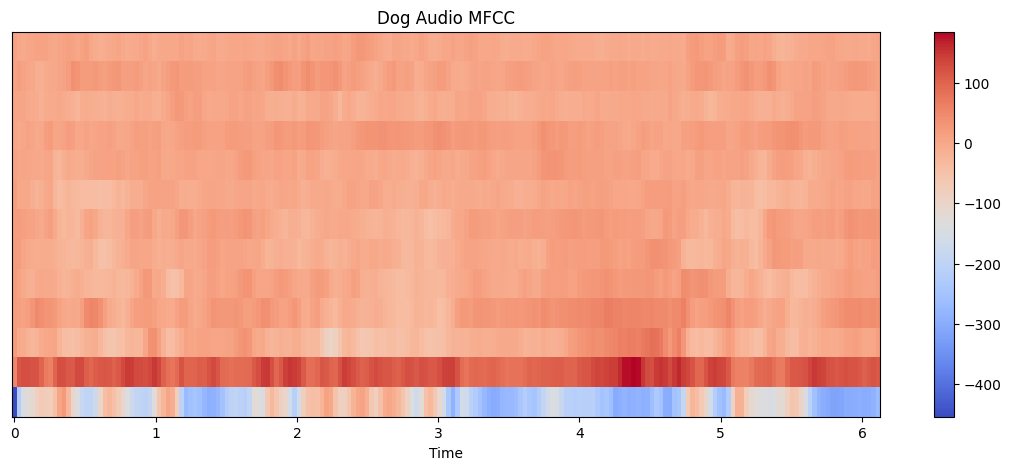

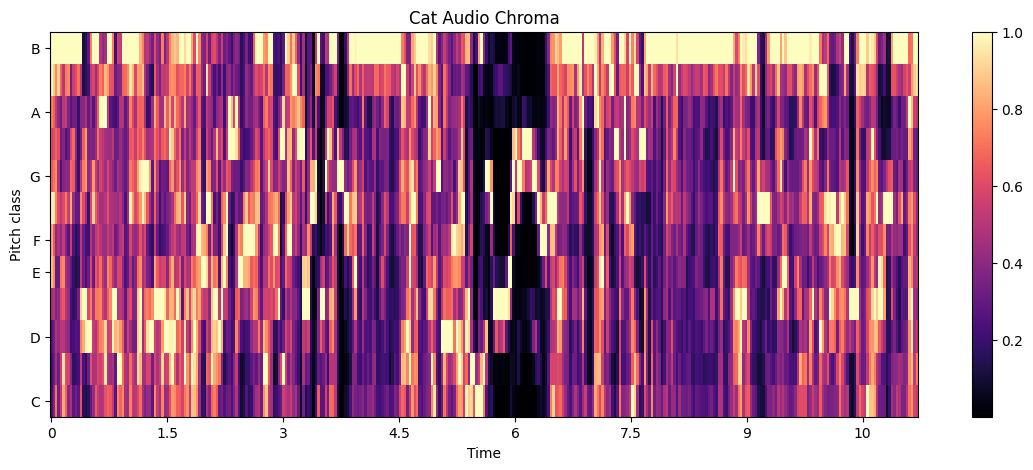

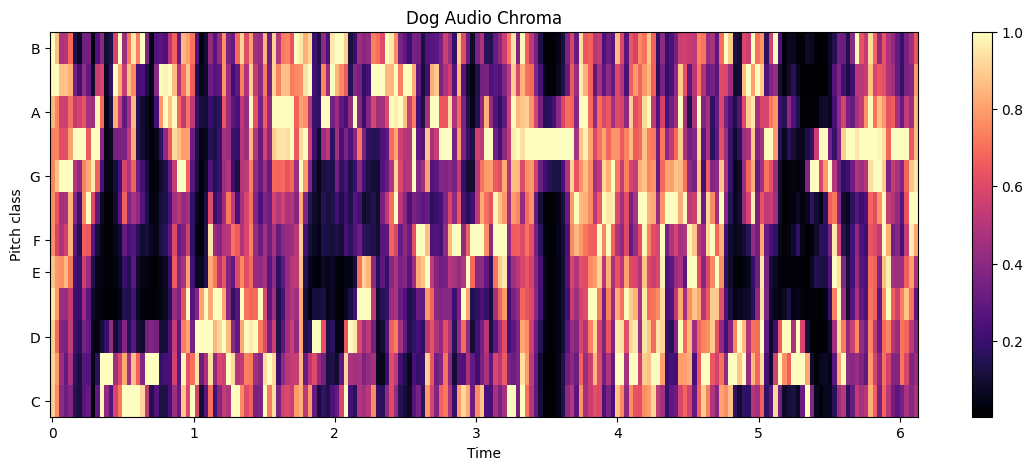

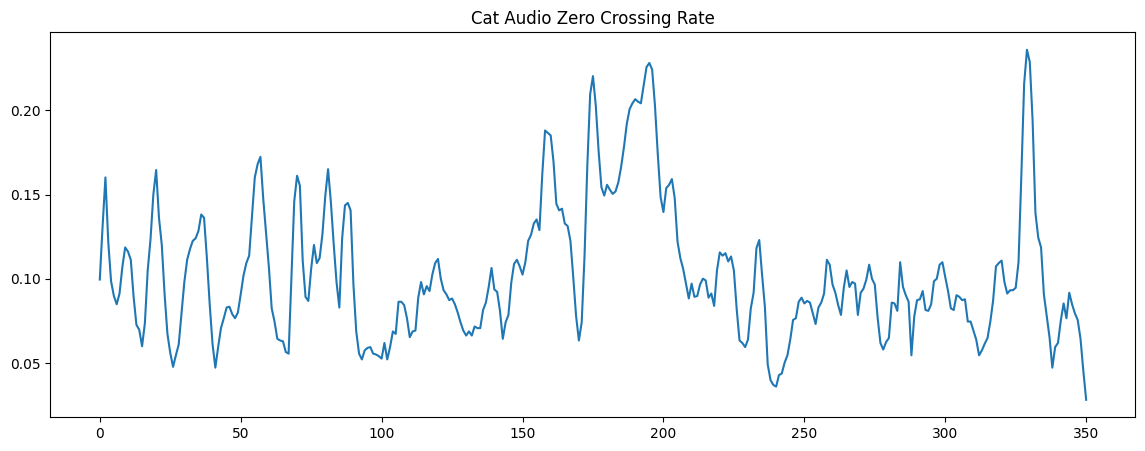

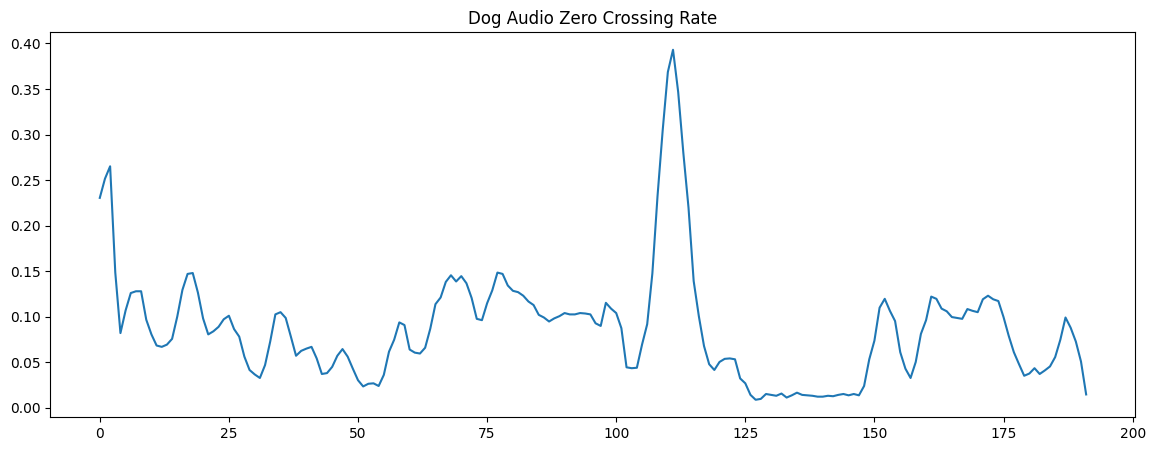

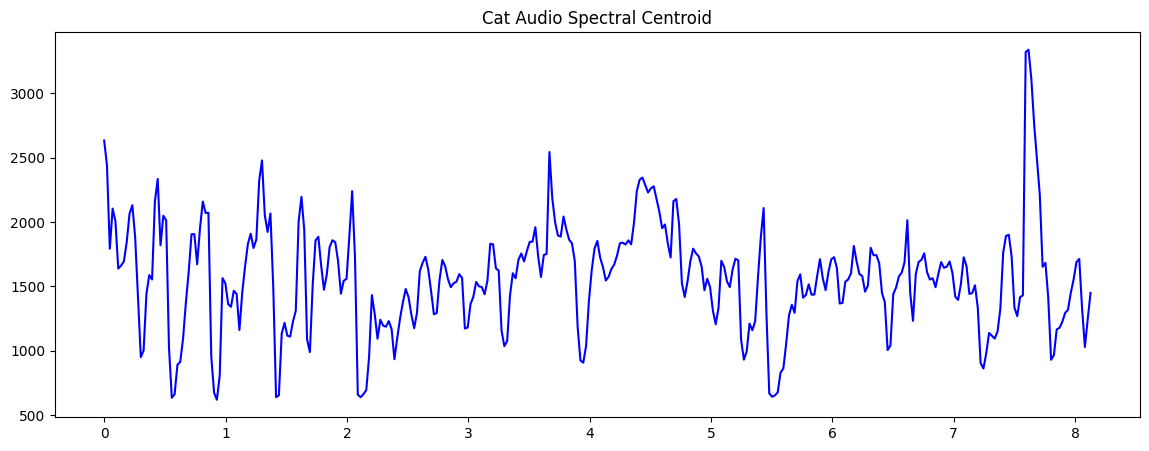

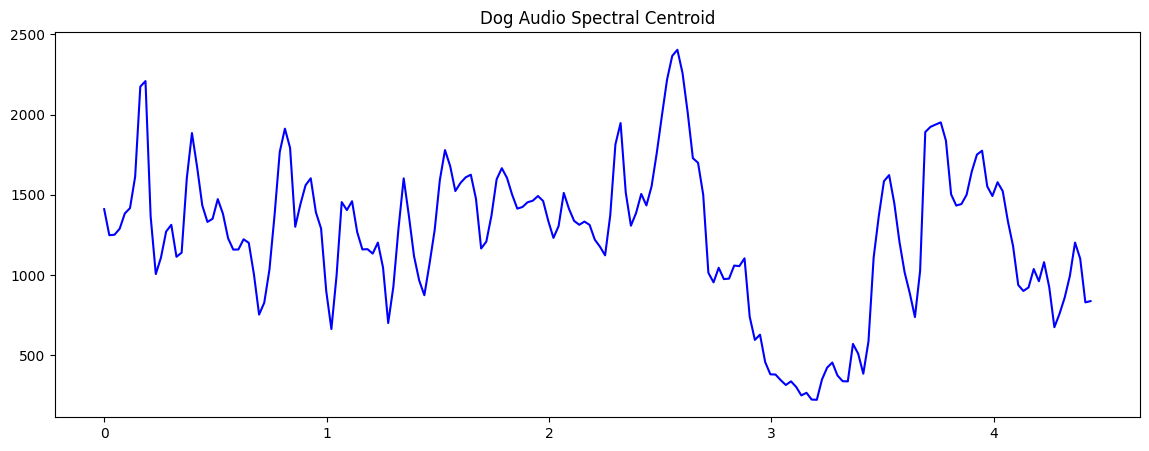

Validation Set Performance for Random Forest Classifier:
[[20  1]
 [ 2 19]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.95      0.90      0.93        21

    accuracy                           0.93        42
   macro avg       0.93      0.93      0.93        42
weighted avg       0.93      0.93      0.93        42

Test Set Performance for Random Forest Classifier:
[[36  3]
 [ 6 22]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        39
           1       0.88      0.79      0.83        28

    accuracy                           0.87        67
   macro avg       0.87      0.85      0.86        67
weighted avg       0.87      0.87      0.86        67

Validation Set Performance for Support Vector Machine Classifier:
[[19  2]
 [ 3 18]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
      

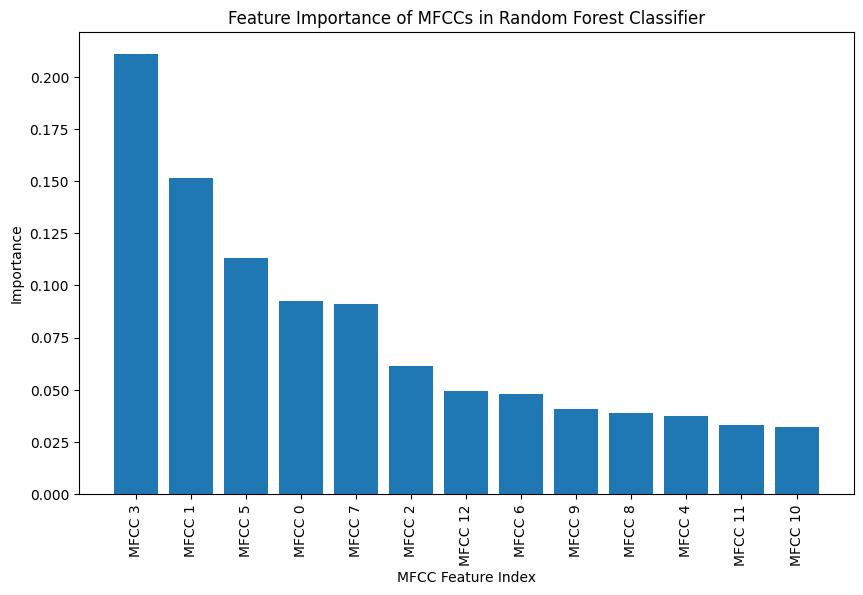

MFCC 3: 0.21088665368505669
MFCC 1: 0.15147009383032195
MFCC 5: 0.11302504249190817
MFCC 0: 0.0926451580879308
MFCC 7: 0.09112257514670537
MFCC 2: 0.06129480304556299
MFCC 12: 0.049201323302152634
MFCC 6: 0.047792921620703574
MFCC 9: 0.04066020942289878
MFCC 8: 0.03878624132940298
MFCC 4: 0.037471892734882495
MFCC 11: 0.03335290291893892
MFCC 10: 0.03229018238353464


In [7]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Function to load all audio files from a directory
def load_audio_files(directory):
    audio_files = []
    labels = []
    for folder in ['cats', 'dogs']:
        folder_path = os.path.join(directory, folder)
        for file in os.listdir(folder_path):
            if file.endswith('.wav'):  # Assuming audio files are in .wav format
                file_path = os.path.join(folder_path, file)
                audio, sr = librosa.load(file_path, sr=None)
                audio_files.append((audio, sr))
                labels.append(folder)
    return audio_files, labels

# Load audio files from train and test directories
train_audio_files, train_labels = load_audio_files('train')
test_audio_files, test_labels = load_audio_files('test')

# Function to normalize audio signals
def normalize_audio(audio):
    return audio / np.max(np.abs(audio))

# Normalize train and test audio files
train_audio_files = [(normalize_audio(audio), sr) for audio, sr in train_audio_files]
test_audio_files = [(normalize_audio(audio), sr) for audio, sr in test_audio_files]

# Function to compute the Short-Time Fourier Transform (STFT)
def compute_stft(audio, sr, n_fft=2048, hop_length=512):
    stft = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length)
    stft_db = librosa.amplitude_to_db(np.abs(stft), ref=np.max)
    return stft_db

# Function to plot waveform
def plot_waveform(audio, sr, title):
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(audio, sr=sr)
    plt.title(title)
    plt.show()

# Function to plot spectrogram
def plot_spectrogram(audio, sr, title):
    stft = compute_stft(audio, sr)
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(stft, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

# Function to plot MFCC
def plot_mfcc(audio, sr, title):
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.colorbar()
    plt.title(title)
    plt.show()

# Function to plot Chroma feature
def plot_chroma(audio, sr, title):
    chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma')
    plt.colorbar()
    plt.title(title)
    plt.show()

# Function to plot Zero Crossing Rate
def plot_zero_crossing_rate(audio, sr, title):
    zcr = librosa.feature.zero_crossing_rate(audio)
    plt.figure(figsize=(14, 5))
    plt.plot(zcr[0])
    plt.title(title)
    plt.show()

# Function to plot Spectral Centroid
def plot_spectral_centroid(audio, sr, title):
    spectral_centroids = librosa.feature.spectral_centroid(y=audio, sr=sr)[0]
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)
    plt.figure(figsize=(14, 5))
    plt.plot(t, spectral_centroids, color='b')
    plt.title(title)
    plt.show()

# Compute STFT for a sample audio from each category
cat_audio, cat_sr = train_audio_files[0]  # Example cat audio
dog_audio, dog_sr = train_audio_files[-1]  # Example dog audio

# Plot various visualizations for cat and dog audio
plot_waveform(cat_audio, cat_sr, 'Cat Audio Waveform')
plot_waveform(dog_audio, dog_sr, 'Dog Audio Waveform')

plot_spectrogram(cat_audio, cat_sr, 'Cat Audio Spectrogram')
plot_spectrogram(dog_audio, dog_sr, 'Dog Audio Spectrogram')

plot_mfcc(cat_audio, cat_sr, 'Cat Audio MFCC')
plot_mfcc(dog_audio, dog_sr, 'Dog Audio MFCC')

plot_chroma(cat_audio, cat_sr, 'Cat Audio Chroma')
plot_chroma(dog_audio, dog_sr, 'Dog Audio Chroma')

plot_zero_crossing_rate(cat_audio, cat_sr, 'Cat Audio Zero Crossing Rate')
plot_zero_crossing_rate(dog_audio, dog_sr, 'Dog Audio Zero Crossing Rate')

plot_spectral_centroid(cat_audio, cat_sr, 'Cat Audio Spectral Centroid')
plot_spectral_centroid(dog_audio, dog_sr, 'Dog Audio Spectral Centroid')

# Function to extract MFCC features
def extract_features(audio_files):
    features = []
    for audio, sr in audio_files:
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
        mfccs_mean = np.mean(mfccs.T, axis=0)
        features.append(mfccs_mean)
    return np.array(features)

# Extract features from train and test audio files
train_features = extract_features(train_audio_files)
test_features = extract_features(test_audio_files)

# Prepare labels (0 for cats, 1 for dogs)
label_map = {'cats': 0, 'dogs': 1}
train_labels = np.array([label_map[label] for label in train_labels])
test_labels = np.array([label_map[label] for label in test_labels])

# Split train data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)

# Define a function to train and evaluate multiple models
def train_and_evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    
    # Evaluate the model on validation set
    y_val_pred = model.predict(X_val)
    print(f"Validation Set Performance for {model_name}:")
    print(confusion_matrix(y_val, y_val_pred))
    print(classification_report(y_val, y_val_pred))
    
    # Evaluate the model on test set
    y_test_pred = model.predict(test_features)
    print(f"Test Set Performance for {model_name}:")
    print(confusion_matrix(test_labels, y_test_pred))
    print(classification_report(test_labels, y_test_pred))

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate_model(rf_clf, "Random Forest Classifier")

# Support Vector Machine Classifier
svm_clf = SVC(kernel='linear', random_state=42)
train_and_evaluate_model(svm_clf, "Support Vector Machine Classifier")

# k-Nearest Neighbors Classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate_model(knn_clf, "k-Nearest Neighbors Classifier")

# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
train_and_evaluate_model(gb_clf, "Gradient Boosting Classifier")

# Plot feature importance for Random Forest (as an example)
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = [f"MFCC {i}" for i in range(len(importances))]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance of MFCCs in Random Forest Classifier")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.xlabel('MFCC Feature Index')
plt.ylabel('Importance')
plt.show()

# Print out the feature importance with names for Random Forest
for i in range(len(importances)):
    print(f"{feature_names[indices[i]]}: {importances[indices[i]]}")